In [17]:
hello_rules = '''
say_hello = name hello
names = name names | name
name = Jonh|Mike|老梁|老刘
hello = 你好|您来啦|快请进
tail = 呀|！
'''

In [2]:
import random

In [6]:
def name():
    return random.choice('Jonh|Mike|老梁'.split('|'))

def hello():
    return random.choice('你好|您来啦|快请进'.split('|'))

def say_hello():
    return name()+' '+hello()

In [7]:
say_hello()

'Mike 您来啦'

In [23]:
stmt_split = '='
or_split = '|'
rules = dict()
for line in hello_rules.split('\n'):
    if not line: continue
    
    stmt, expr = line.split(stmt_split)
    
    rules[stmt.strip()] = expr.split(or_split)

In [21]:
rules

{'say_hello': [' name hello'],
 'names': [' name names ', ' name'],
 'name': [' Jonh', 'Mike', '老梁', '老刘'],
 'hello': [' 你好', '您来啦', '快请进'],
 'tail': [' 呀', '！']}

In [68]:
def generate(grammer_rule, target):
    if target in grammer_rule:
        candidates = grammer_rule[target]
        candidate = random.choice(candidates).strip()
        candidate = candidate.split(' ')
        return ' '.join(generate(grammer_rule, target = c.strip()) for c in candidate if c != 'null')
    else: 
        return target

In [39]:
generate(rules, 'say_hello')

'老梁 你好'

In [69]:
def get_generation_by_gram(grammer_str, target, stmt_split='=', expr_split='|'):
    rules = dict()
    for line in grammer_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.strip().split(expr_split)
    return generate(rules, target)

In [70]:
get_generation_by_gram(hello_rules, 'say_hello')

'Jonh 您来啦'

In [71]:
hello_rules.split('\n')

['',
 'say_hello = name hello',
 'names = name names | name',
 'name = Jonh|Mike|老梁|老刘',
 'hello = 你好|您来啦|快请进',
 'tail = 呀|！',
 '']

In [54]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [58]:
get_generation_by_gram(simple_grammar, 'sentence', '=>')

'一个 小小的  桌子 坐在 这个 好看的 蓝色的  篮球'

In [72]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [75]:
get_generation_by_gram(programming, 'stmt', '=>')

'if ( database 1 ) { /n .... if ( database 3 ) { /n .... student database 3 = student course 1 } }'

In [76]:
corpus = r'C:\迅雷下载\article_9k.txt'

In [80]:
FILE = open(corpus, encoding='utf-8').read()

In [82]:
def generate_by_pro(text_corpus, length):
    return ''.join(random.sample(text_corpus,length))

In [83]:
generate_by_pro(FILE, 10)

'和鲜春贸午开协低一标'

In [84]:
import jieba

In [85]:
max_lenght = 1000000
sub_file = FILE[:max_lenght]

In [86]:
def cut(string):
    return list(jieba.cut(string))

In [87]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Daddy\AppData\Local\Temp\jieba.cache
Loading model cost 0.893 seconds.
Prefix dict has been built succesfully.


In [88]:
len(TOKENS)

532454

In [89]:
import collections

In [90]:
% matplotlib inline

In [91]:
from collections import Counter
words_count  = Counter(TOKENS)

In [93]:
words_freq = [f for w, f in words_count.most_common()]

In [94]:
import matplotlib.pyplot as plt

In [96]:
import numpy as np

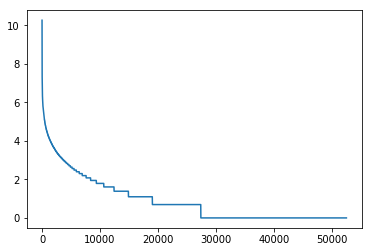

In [97]:
plt.plot(np.log(words_freq))

In [99]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [104]:
_2_gram_word_counts = Counter(_2_gram_words)

In [101]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [108]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
         return words_count.most_common()[-1][-1]

In [109]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
         return _2_gram_word_counts.most_common()[-1][-1]

In [110]:
def _2_gram_model(sentence):
    tokens = cut(sentence)
    
    probability = 1
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        pro = get_2_gram_count(word + next_word) / get_1_gram_count(next_word)
        
        probability *= pro
        
    return probability

In [115]:
_2_gram_model('前天早上吃晚饭的时候')

7.429922323539344e-07

In [35]:
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 来一场 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

In [2]:
import random

In [16]:
def create_rules(rule_str, line_split='\n', stmt_split='=', expr_split='|'):
    rules = dict()
    for line in rule_str.split(line_split):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] =[i.strip() for i in expr.split(expr_split)]
    return rules

In [36]:
rule_1 = create_rules(host)

In [18]:
'寒暄' in rule

True

In [23]:
rule

{'host': ['寒暄 报数 询问 业务相关 结尾'],
 '报数': ['我是 数字 号 ,'],
 '数字': ['单个数字', '数字 单个数字'],
 '单个数字': ['1', '2', '3', '4', '5', '6', '7', '8', '9'],
 '寒暄': ['称谓 打招呼', '打招呼'],
 '称谓': ['人称 ,'],
 '人称': ['先生', '女士', '小朋友'],
 '打招呼': ['你好', '您好'],
 '询问': ['请问你要', '您需要'],
 '业务相关': ['玩玩 具体业务'],
 '玩玩': ['耍一耍', '玩一玩'],
 '具体业务': ['喝酒', '打牌', '打猎', '赌博'],
 '结尾': ['吗？']}

In [30]:
def generate(rule_dummy, target):
    if target in rule_dummy:
        candidates = rule_dummy[target]
        candidate = random.choice(candidates)
        candidate = candidate.split(' ')
        return ''.join(generate(rule_dummy, c) for c in candidate)
    return ''.join(target)

In [39]:
generate(rule_1, 'host')

'你好我是993号,请问你要玩一玩喝酒吗？'

In [40]:
location = r'C:\graduate\freshman1\nlp\train.txt'
FILE = open(location, encoding='utf-8').read()

In [42]:
FILE[:100]

'0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is  Disability  Insurance  Required  By  Law?\n1 '

In [43]:
import re

In [159]:
pattern = re.compile('[\u4e00-\u9fa5]+')
result1 = pattern.findall('$ runoob+ 123 google 456 郭奕42?？')

In [160]:
result1

['郭奕']

In [102]:
it = re.finditer(pattern,FILE, flags=0)

In [103]:
st = ''
for i in it:
    st += i.group()

In [104]:
print(st[:500])

法律要求残疾保险吗债权人可以在死后人寿保险吗旅行者保险有租赁保险吗我可以开一辆没有保险的新车吗人寿保险的现金转出价值是否应纳税如何报告年金收入家庭保险涵盖什么什么是简单的退休计划社会保险残疾保险是什么汽车保险是否预付医疗保险部分盖什么退伍军人能否获得人寿保险我的房主保险是否包括失去的结婚戒指分配风险汽车保险如何工作我的男朋友可以加我的汽车保险吗我是否需要提交私人财产车祸索赔的警察报告全覆盖汽车保险盖修理人生在伊斯兰教中是否可以接受健康保险是否覆盖管道逆转如果您已经诊断为乳腺癌您可以获得多大的人寿保险我需要注册医疗保险短期残疾保险是否工作房主保险盖池什么时候要注册医疗保险会影响我的汽车保险吗蓝十字蓝盾有人寿保险吗长期护理保险的优点和缺点是什么医疗保险支付生命预警我应该买哪种人寿医疗保险支付筛查吗哪个是最好的人寿保险长期护理保险费用多少固定年金如何安全要解决人寿保险索赔需要多长时间是否检查汽车保险信贷我可以使用支付长期护理保险吗雇主可以向吸烟者收取更多健康保险费吗房屋所有权保险通常覆盖什么没有健康保险的超声波成本是多少什么是年期人寿保险你可以把钱放在一个和一个我可以用丙型肝炎保险吗什么时候


In [105]:
import jieba

In [123]:
token = list(jieba.cut(st))

In [113]:
from collections import Counter

In [124]:
ct = Counter(token)

In [125]:
ct.most_common()[500]

('妻子', 12)

In [129]:
def get_1_word_count(word):
    if word in ct:
        return ct[word]
    return ct.most_common()[-1][1]

In [132]:
_2_gram_words = [token[i]+token[i+1] for i in range(len(token)-1)]
ct_2 = Counter(_2_gram_words)

In [133]:
def get_2_word_count(word):
    if word in _2_gram_words:
        return ct_2[word]
    return ct_2.most_common()[-1][1]

In [134]:
def n_gram_model(txt):
    probability = 1
    tokens = list(jieba.cut(txt))
    for i in range(len(tokens)-1):
        pr = get_2_word_count(tokens[i]+tokens[i+1])/get_1_word_count(tokens[i+1])
        probability *= pr
        
    return probability    

In [137]:
n_gram_model('哔哩哔哩干杯')

1.0

In [138]:
ct_2.

Counter({'法律要求': 7,
         '要求残疾': 1,
         '残疾保险': 658,
         '保险吗': 511,
         '吗债权人': 5,
         '债权人可以': 12,
         '可以在': 187,
         '在死': 1,
         '死后': 6,
         '后人寿保险': 2,
         '人寿保险吗': 312,
         '吗旅行者': 2,
         '旅行者保险': 1,
         '保险有': 67,
         '有租赁': 11,
         '租赁保险': 154,
         '吗我': 210,
         '我可以': 530,
         '可以开': 4,
         '开一辆': 2,
         '一辆没有': 4,
         '没有保险': 43,
         '保险的': 280,
         '的新车': 6,
         '新车吗': 4,
         '吗人寿保险': 117,
         '人寿保险的': 134,
         '的现金': 26,
         '现金转': 1,
         '转出': 1,
         '出价值': 1,
         '价值是否': 3,
         '是否应': 35,
         '应纳税': 45,
         '纳税如何': 4,
         '如何报告': 3,
         '报告年': 1,
         '年金': 427,
         '金收入': 6,
         '收入家庭': 1,
         '家庭保险': 440,
         '保险涵盖': 99,
         '涵盖什么': 76,
         '什么什么': 97,
         '什么是': 1152,
         '是简单': 1,
         '简单的': 2,
         '的退休': 41,
         '退休计划': 289,
     

In [161]:
insurance = '''
question = 人称 问词 谓词 种类 保险吗？
人称 = 我|你
问词 = 需要|应该|如何
谓词 = 购买|缴纳|null
种类 = 商业|健康|医疗|汽车
'''

In [165]:
def create_rule(rule_str, line_split='\n', stmt_split='=', expr_split='|'):
    new_rule = dict()
    for line in rule_str.split(line_split):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        new_rule[stmt.strip()] = expr.strip().split(expr_split)
    return new_rule

In [166]:
create_rule(insurance)

{'question': ['人称 问词 谓词 种类 保险吗？'],
 '人称': ['我', '你'],
 '问词': ['需要', '应该', '如何'],
 '谓词': ['购买', '缴纳', 'null'],
 '种类': ['商业', '健康', '医疗', '汽车']}

In [174]:
def generate(new_rule, target):
    if target in new_rule:
        candidates = new_rule[target]
        candidate = random.choice(candidates)
        candidate = candidate.split(' ')
        return ''.join(generate(new_rule, c) for c in candidate if c != 'null') 
    return ''.join(target)

In [176]:
generate(create_rule(insurance), 'question')

'你需要医疗保险吗？'

In [177]:
def generage_n(n):
    sentences = []
    for i in range(n):
        sentences.append(generate(create_rule(insurance), 'question'))
    return sentences

In [179]:
test = generage_n(10)

In [182]:
def generate_best(sentences):
    score_list = []
    for i in sentences:
        score_list.append((i, n_gram_model(i)))
    return sorted(score_list, key=lambda x: x[1], reverse=True)[0][0]

In [183]:
generate_best(test)

'我需要医疗保险吗？'